<H1> SEGUNDA PARTE DE LA TAREA </H1>

En este apartado vamos a utilizar un modelo propio de y seguidamente usaremos uno ya preentrenado para utilizar ELI5.keras

Instalaciòn de dependencias:

Con esto actualizamos la libreria scikit-learn

Instalamos la libreria ELI5

In [47]:
pip install eli5

Importamos las librerias de la documentaciòn que se fueron mencionadas

En este caso estamos usando mobilenet_v2:
MobileNetV2 es una arquitectura de red neuronal convolucional (CNN) diseñada principalmente para tareas de visión por computadora en dispositivos móviles y con recursos computacionales limitados. Fue desarrollada por Google y es una mejora de su predecesora, MobileNetV1.

In [48]:
from PIL import Image
from IPython.display import display
import numpy as np

# you may want to keep logging enabled when doing your own work
import logging
import tensorflow as tf
tf.get_logger().setLevel(logging.ERROR) # disable Tensorflow warnings for this tutorial
import warnings
warnings.simplefilter("ignore") # disable Keras warnings for this tutorial
import keras
from keras.applications import mobilenet_v2
import eli5



En este caso, se tiene un modelo preentrenado de mobilenet con 1000 clases para clasificar, por lo que extraemos la informaciòn correspondiente del modelo para identificar la dimensiòn de entrada

In [49]:
model = mobilenet_v2.MobileNetV2(include_top=True, weights='imagenet', classes=1000)

# check the input format
print(model.input_shape)
dims = model.input_shape[1:3] # -> (height, width)
print(dims)

(None, 224, 224, 3)
(224, 224)


En este casi, la dimensiòn de entrada del modelo son imagenes de 224x224 RGB, de igual modo es importante revisar la arquitectura de este modelo de la siguiente manera

In [50]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_3[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[

Como se pede apreciar, se tiene una entrada de 224x224x3 y una salida de 1000 clases, es un modelo bastante grande, el hecho de que lo podamos usar para nuestras aplicaciones es muy beneficioso debido a que realizar el clasificador de manera manual con redes neuronales requiere una gran capacidad de computo. Por lo que vamos a probar este modelo con una imagen de prueba.

Importamos las librerias necesarais

In [51]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from imageio import imread
from keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input, decode_predictions

Realizamos la llamada del modelo MobileNetV2

In [52]:
model = MobileNetV2(weights='imagenet')
matias_path = '/content/Matias.jfif'
matias = cv2.imread(matias_path)
matias_resized = cv2.resize(matias, dsize=(224, 224), interpolation=cv2.INTER_CUBIC)

Reescalamos la imagen de entrada para que sea acorde con el modelo de MobileNetV2

In [53]:
data = np.empty((1, 224, 224, 3))
data[0] = matias_resized
data = preprocess_input(data)

Realizamos las predicciones e imprimimos la etiqueta predicha

Etiqueta predicha: Brittany_spaniel


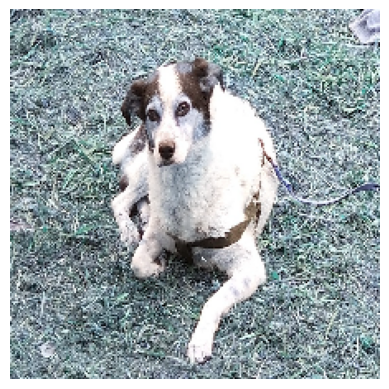

In [54]:
predictions = model.predict(data)
decoded_predictions = decode_predictions(predictions, top=1)[0]
predicted_label = decoded_predictions[0][1]
print(f'Etiqueta predicha: {predicted_label}')
plt.imshow(matias_resized)
plt.axis('off')
plt.show()



Como se puede apreciar, la mascota de Esteban es un perro de raza Brittany_spaniel, por lo que el modelo funciona perfectamente, sin embargo vamos a analizar el comportamiento del mismo con ayuda de ELI5.Keras

Vamos a analizar el funcionamiento del modelo con la pulsar NS 200 de Roberto Mosquera, este proceso con ayuda de ELI5.Keras

In [55]:
model = MobileNetV2(weights='imagenet')
Pulsar_path = '/content/Pulsar 200.jfif'
Pulsar = cv2.imread(Pulsar_path)
Pulsar_resized = cv2.resize(Pulsar, dsize=(224, 224), interpolation=cv2.INTER_CUBIC)

Este código en Python crea un arreglo de datos de imagen vacío, lo llena con una imagen redimensionada y luego aplica un preprocesamiento a los datos de la imagen antes de su uso, probablemente para alimentar un modelo de aprendizaje automático.

In [56]:
data = np.empty((1, 224, 224, 3))
data[0] = Pulsar_resized
data = preprocess_input(data)

Este código hace predicciones utilizando un modelo previamente entrenado sobre los datos de imagen proporcionados. Luego, decodifica las predicciones para obtener la etiqueta predicha más probable. Finalmente, muestra la imagen redimensionada junto con su etiqueta predicha utilizando Matplotlib.

Etiqueta predicha: moped


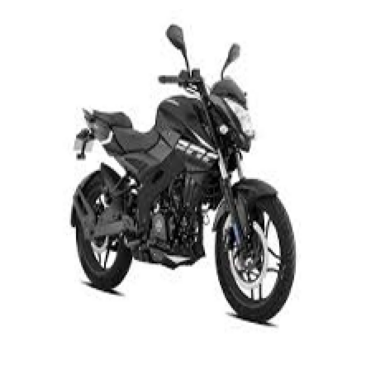

In [57]:
predictions = model.predict(data)
decoded_predictions = decode_predictions(predictions, top=1)[0]
predicted_label = decoded_predictions[0][1]
print(f'Etiqueta predicha: {predicted_label}')
plt.imshow(Pulsar_resized)
plt.axis('off')
plt.show()

<H2> Analisis del modelo mediante la libreria ELI5 </h2>

Vamos a cargar una imagen de prueba para que el modelo realice la clasificacion.

<class 'PIL.JpegImagePlugin.JpegImageFile'>


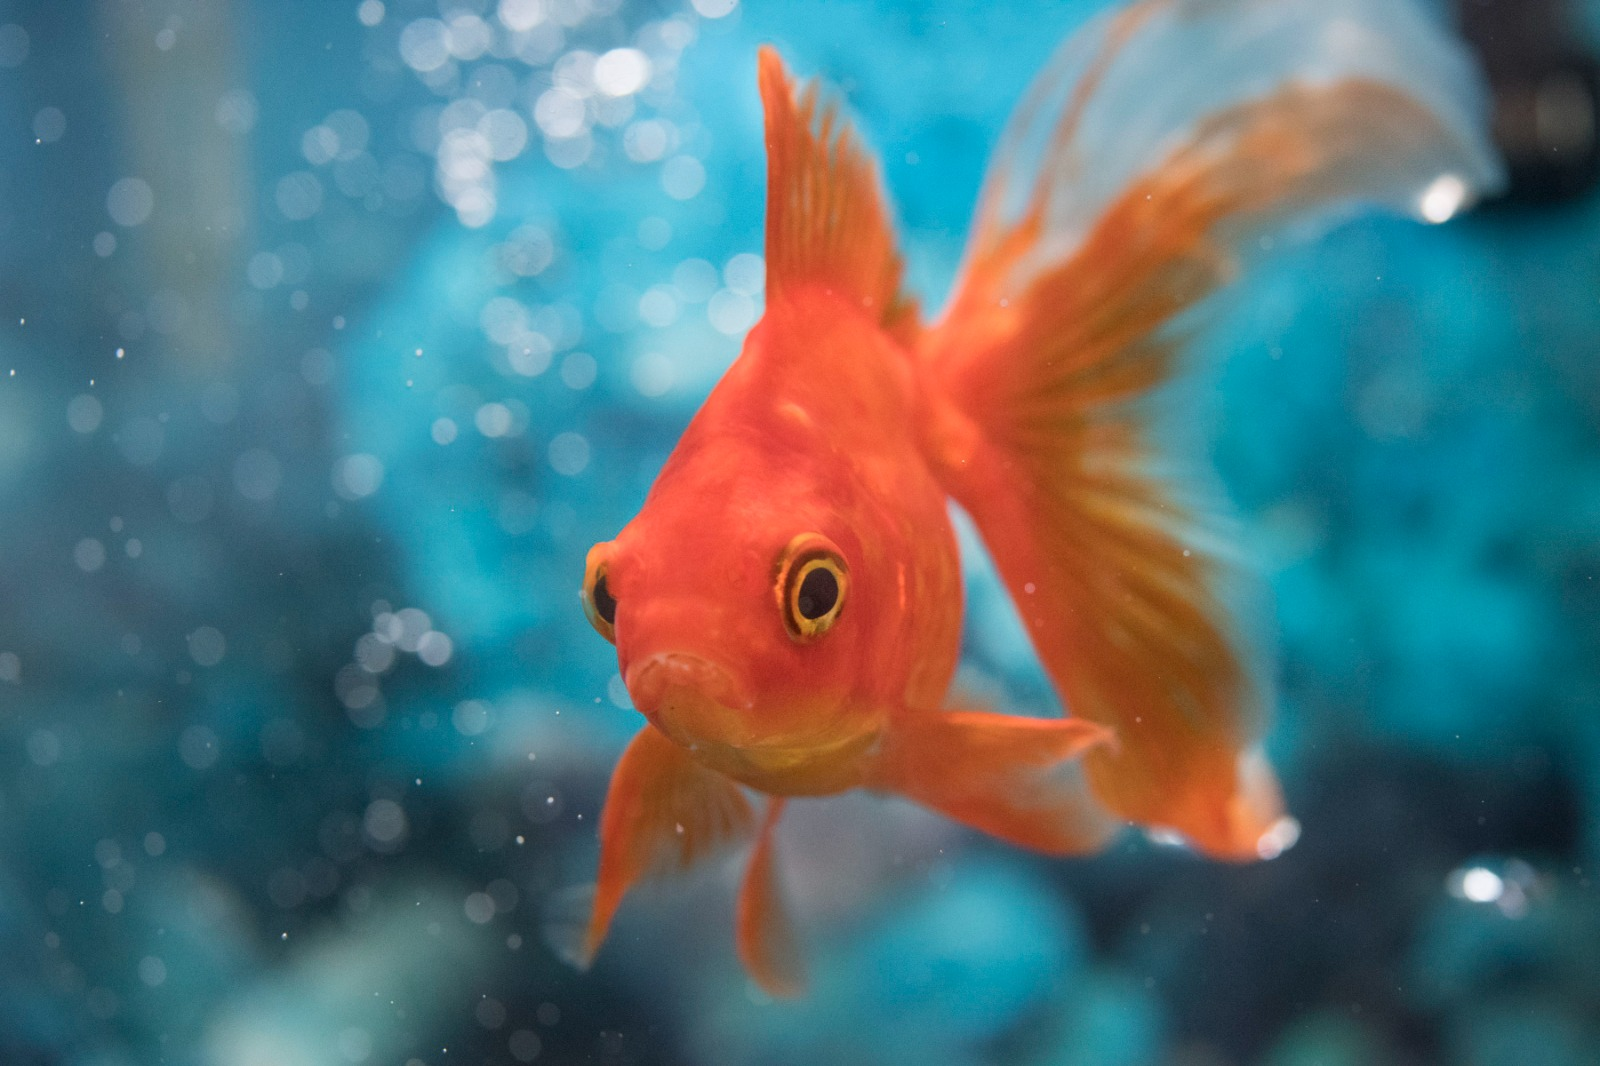

In [58]:
image_uri = '/content/R.jfif'
im = Image.open(image_uri)
print(type(im))
display(im)

En este caso imprimimos la imagen en tamaño 224x224, la cual visualizamos abajo.

<PIL.Image.Image image mode=RGB size=224x224 at 0x7A0BE65D3FD0>


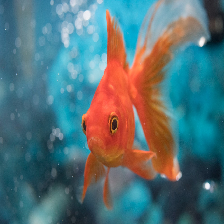

In [59]:
# we could resize the image manually
# but instead let's use a utility function from `keras.preprocessing`
# we pass the required dimensions as a (height, width) tuple
im = keras.preprocessing.image.load_img(image_uri, target_size=dims) # -> PIL image
print(im)
display(im)

<h3> 1) En este caso explicamos la prediccion de nuestro modelo



In [60]:
# we use a routine from `keras.preprocessing` for that as well
# we get a 'doc', an object almost ready to be inputted into the model

doc = keras.preprocessing.image.img_to_array(im) # -> numpy array
print(type(doc), doc.shape)

<class 'numpy.ndarray'> (224, 224, 3)


En este paso lo que se realizo fue ubicar la imagen en la primera posicion.

In [61]:
# dimensions are looking good
# except that we are missing one thing - the batch size

# we can use a numpy routine to create an axis in the first position
doc = np.expand_dims(doc, axis=0)
print(type(doc), doc.shape)

<class 'numpy.ndarray'> (1, 224, 224, 3)


En esta línea de código primero preprocesa los datos de entrada doc utilizando la función preprocess_input de MobileNetV2, y luego imprime el tipo de datos y la forma de doc antes del preprocesamiento. Esto es útil para comprender cómo se transforman los datos antes de ser alimentados a la red neuronal.

In [62]:
# `keras.applications` models come with their own input preprocessing function
# for best results, apply that as well

# mobilenetv2-specific preprocessing
# (this operation is in-place)
mobilenet_v2.preprocess_input(doc)
print(type(doc), doc.shape)

<class 'numpy.ndarray'> (1, 224, 224, 3)


En este paso imprimimos la imagen para ser visualizada.

<PIL.Image.Image image mode=RGB size=224x224 at 0x7A0BE58ACB50>


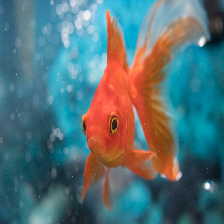

In [63]:
# take back the first image from our 'batch'
image = keras.preprocessing.image.array_to_img(doc[0])
print(image)
display(image)

En este paso imprimimos las clases entre las cuales esta el modelo, en este caso esta entre 1 y 1000.

In [64]:
# make a prediction about our sample image
predictions = model.predict(doc)
print(type(predictions), predictions.shape)

<class 'numpy.ndarray'> (1, 1000)


<h3> 2) Muestra de las predicciones del modelo. </h3>

En el siguiente fragmento de codigo, se muestran las predicciones realizadas por el modelo, como se puede apreciar en la parte inferior, se dice que es de la clase goldfish por lo menos un 94% lo cual es correcto

In [65]:
top = mobilenet_v2.decode_predictions(predictions)
top_indices = np.argsort(predictions)[0, ::-1][:5]

print(top)
print(top_indices)

[[('n01443537', 'goldfish', 0.946952), ('n02607072', 'anemone_fish', 0.003998872), ('n01914609', 'sea_anemone', 0.002095176), ('n02606052', 'rock_beauty', 0.0010611323), ('n09256479', 'coral_reef', 0.00085281685)]]
[  1 393 108 392 973]


In [67]:
import tensorflow as tf
tf.compat.v1.disable_eager_execution()

Ahora con ayuda de la funciòn de eli5 .show_prediction, se muestra la zona donde hay mas caracteristicas relevantes del modelo, en este caso se revela la cara del pez goldfish y se revela las partes mas relevantes que distinguen a este pez a comparaciòn de otros

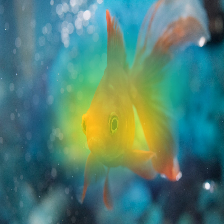

In [68]:
eli5.show_prediction(model, doc, image=image)

En este caso, se pasa el índice de la clase correspondiente a "tiger_cat" en la base de datos de ImageNet como objetivo para la explicación. Esto ayudaría a comprender cómo el modelo clasifica la imagen en la clase de "tiger_cat. Como se puede apreciar, el modelo no clasifica al pez debido a que este no se parece a un gato

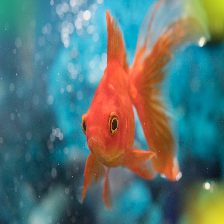

In [69]:
cat_idx = 282 # ImageNet ID for "tiger_cat" class, because we have a cat in the picture
eli5.show_prediction(model, doc, targets=[cat_idx]) # pass the class id


Este código divide un modelo de red neuronal convolucional en dos partes: la "cabeza" y la "cola". La "cabeza" abarca las primeras capas del modelo, mientras que la "cola" comprende las últimas. La función pretty_print_layers imprime información detallada sobre cada capa, incluyendo su nombre, tipo, forma de salida y número de parámetros. Luego, se imprimen por separado las capas de la "cabeza" y la "cola", brindando una comprensión visual de la estructura del modelo y la complejidad de cada segmento.

In [70]:
# we could use model.summary() here, but the model has over 100 layers.
# we will only look at the first few and last few layers

head = model.layers[:5]
tail = model.layers[-8:]

def pretty_print_layers(layers):
    for l in layers:
        info = [l.name, type(l).__name__, l.output_shape, l.count_params()]
        pretty_print(info)

def pretty_print(lst):
    s = ',\t'.join(map(str, lst))
    print(s)

pretty_print(['name', 'type', 'output shape', 'param. no'])
print('-'*100)
pretty_print([model.input.name, type(model.input), model.input_shape, 0])
pretty_print_layers(head)
print()
print('...')
print()
pretty_print_layers(tail)

name,	type,	output shape,	param. no
----------------------------------------------------------------------------------------------------
input_5:0,	<class 'tensorflow.python.framework.ops.SymbolicTensor'>,	(None, 224, 224, 3),	0
input_5,	InputLayer,	[(None, 224, 224, 3)],	0
Conv1,	Conv2D,	(None, 112, 112, 32),	864
bn_Conv1,	BatchNormalization,	(None, 112, 112, 32),	128
Conv1_relu,	ReLU,	(None, 112, 112, 32),	0
expanded_conv_depthwise,	DepthwiseConv2D,	(None, 112, 112, 32),	288

...

block_16_depthwise_relu,	ReLU,	(None, 7, 7, 960),	0
block_16_project,	Conv2D,	(None, 7, 7, 320),	307200
block_16_project_BN,	BatchNormalization,	(None, 7, 7, 320),	1280
Conv_1,	Conv2D,	(None, 7, 7, 1280),	409600
Conv_1_bn,	BatchNormalization,	(None, 7, 7, 1280),	5120
out_relu,	ReLU,	(None, 7, 7, 1280),	0
global_average_pooling2d_6,	GlobalAveragePooling2D,	(None, 1280),	0
predictions,	Dense,	(None, 1000),	1281000


Este fragmento de código itera sobre una lista de nombres de capas específicas ('block_2_expand', 'block_9_expand', 'Conv_1') y para cada nombre de capa, muestra la predicción y explicación generadas por un modelo de aprendizaje automático, utilizando la biblioteca `eli5`. La función `eli5.show_prediction` se utiliza para mostrar la predicción y explicación de la capa especificada.

block_2_expand


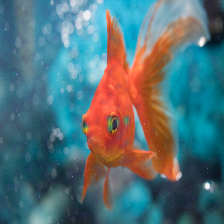

block_9_expand


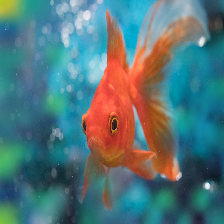

Conv_1


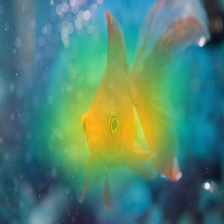

In [71]:
for l in ['block_2_expand', 'block_9_expand', 'Conv_1']:
    print(l)
    display(eli5.show_prediction(model, doc, layer=l)) # we pass the layer as an argument

Este código genera una explicación para la predicción realizada por un modelo de redes neuronales preentrenado utilizando la biblioteca eli5. La función eli5.explain_prediction se utiliza para generar una explicación detallada de la predicción del modelo para el documento de entrada doc.

In [72]:
expl = eli5.explain_prediction(model, doc)
print(expl)

Explanation(estimator='mobilenetv2_1.00_224', description='Grad-CAM visualization for image classification; \noutput is explanation object that contains input image \nand heatmap image for a target.\n', error='', method='Grad-CAM', is_regression=False, targets=[TargetExplanation(target=1, feature_weights=None, proba=None, score=0.946952, weighted_spans=None, heatmap=array([[0.0050524 , 0.0216394 , 0.03216928, 0.11448959, 0.10919805,
        0.04907787, 0.        ],
       [0.01500812, 0.03355603, 0.47398242, 0.60187298, 0.52440888,
        0.28872338, 0.0478166 ],
       [0.01244379, 0.15867261, 0.72727574, 0.74573201, 0.73177538,
        0.59517727, 0.05803594],
       [0.0118934 , 0.41500705, 0.96950812, 0.87132253, 0.90021208,
        0.55201917, 0.03682114],
       [0.00816351, 0.4538422 , 0.99999997, 0.87080187, 0.98975434,
        0.42294149, 0.02542249],
       [0.00589789, 0.06114777, 0.48673682, 0.49627871, 0.37316895,
        0.12650509, 0.01986264],
       [0.00560558, 0.027


Este código imprime las distintas características de un objetivo que está siendo explicado por el objeto expl generado previamente. En particular, accede al primer objetivo (índice 0) dentro de la explicación y luego imprime su puntuación (score) y probabilidad (proba). Esto proporciona información sobre la confianza o certeza del modelo en la predicción para el objetivo específico que está siendo explicado.

In [73]:
# we can access the various attributes of a target being explained
print((expl.targets[0].target, expl.targets[0].score, expl.targets[0].proba))

(1, 0.946952, None)


Este fragmento de código recupera y visualiza las representaciones gráficas generadas por la biblioteca eli5 para explicar las predicciones de un modelo de redes neuronales preentrenado. La variable image contiene una imagen que representa visualmente las características del documento de entrada que influyen en la predicción del modelo. Esta imagen se muestra en pantalla. Además, se accede al mapa de calor (heatmap), que es un array NumPy que destaca las regiones del documento de entrada más relevantes para la predicción del modelo. 

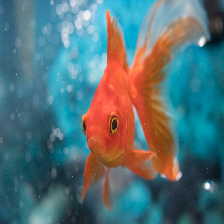

[[0.0050524  0.0216394  0.03216928 0.11448959 0.10919805 0.04907787
  0.        ]
 [0.01500812 0.03355603 0.47398242 0.60187298 0.52440888 0.28872338
  0.0478166 ]
 [0.01244379 0.15867261 0.72727574 0.74573201 0.73177538 0.59517727
  0.05803594]
 [0.0118934  0.41500705 0.96950812 0.87132253 0.90021208 0.55201917
  0.03682114]
 [0.00816351 0.4538422  0.99999997 0.87080187 0.98975434 0.42294149
  0.02542249]
 [0.00589789 0.06114777 0.48673682 0.49627871 0.37316895 0.12650509
  0.01986264]
 [0.00560558 0.02700467 0.03663416 0.08729104 0.04539075 0.02842176
  0.01235195]]


In [74]:
image = expl.image
heatmap = expl.targets[0].heatmap

display(image) # the .image attribute is a PIL image
print(heatmap) # the .heatmap attribute is a numpy array

Este código convierte el mapa de calor (heatmap) generado previamente por la explicación de eli5 en una imagen visualmente comprensible. La función eli5.formatters.image.heatmap_to_image se utiliza para realizar esta conversión, creando una representación gráfica del mapa de calor.

In [75]:
heatmap_im = eli5.formatters.image.heatmap_to_image(heatmap)
display(heatmap_im)

Por lo que aqui se muestra a donde esta apuntando el modelo y donde se encuentra la informaiciòn mas relevnte de la imagen

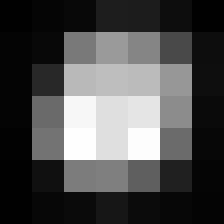

In [76]:
heatmap_im = eli5.formatters.image.expand_heatmap(heatmap, image, resampling_filter=Image.BOX)
display(heatmap_im)

Este código convierte la explicación generada por eli5 en una imagen para facilitar su visualización. La función eli5.format_as_image se utiliza para realizar esta conversión, creando una representación gráfica de la explicación.

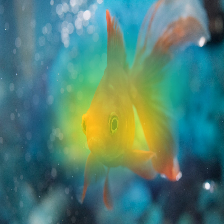

In [77]:
I = eli5.format_as_image(expl)
display(I)


Este código modifica la representación visual de la explicación generada por eli5 al utilizar la paleta de colores "cividis" de matplotlib para la imagen. La función eli5.format_as_image se encarga de convertir la explicación en una imagen utilizando esta paleta de colores específica. Al establecer alpha_limit=1.0, se asegura de que todos los píxeles de la imagen sean completamente opacos, lo que puede mejorar la legibilidad y la claridad de la visualización. 

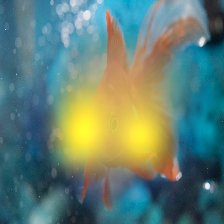

In [78]:
import matplotlib.cm

I = eli5.format_as_image(expl, alpha_limit=1.0, colormap=matplotlib.cm.cividis)
display(I)

Concluciones:

1) Se empleó un modelo preentrenado de MobileNetV2 para realizar predicciones sobre dos imágenes personalizadas. <br>
2) Se utilizó la biblioteca eli5 para explicar las predicciones del modelo en una de las imágenes, específicamente una que contiene un pez dorado (goldfish).<br>
3) Se accedió a varias características de la explicación, incluida la puntuación de la predicción, la probabilidad asignada y los mapas de calor que resaltan las áreas importantes del documento.<br>
4) Se convirtieron los mapas de calor en imágenes visualmente comprensibles y se mostraron en pantalla para facilitar su interpretación.<br>
5) Finalmente, se modificó la representación visual de la explicación utilizando una paleta de colores específica y se mostró nuevamente en pantalla para mejorar la claridad de la visualización.<br>

Referencias:

eli5 = https://eli5.readthedocs.io/en/latest/tutorials/index.html
mobilenetv2 = https://arxiv.org/abs/1801.04381
paper mobilenetv2: https://arxiv.org/pdf/1801.04381v4.pdf
mobilenetv2 with pytorch: https://pytorch.org/hub/pytorch_vision_mobilenet_v2/